# Connecting to the Prompt Hub

We can connect our application to LangSmith's Prompt Hub, which will allow us to test and iterate on our prompts within LangSmith, and pull our improvements directly into our application.

### Setup

In [19]:

from dotenv import load_dotenv
load_dotenv(override=True)

True

### Pull a prompt from Prompt Hub

Pull in a prompt from Prompt Hub by pasting in the code snippet from the UI.

In [20]:

import os
from dotenv import load_dotenv
from langsmith import Client 
from openai import OpenAI
from langchain.prompts.chat import ChatPromptTemplate
from langsmith.client import convert_prompt_to_openai_format 

load_dotenv(override=True) 

MODEL_NAME = "gpt-5-mini" 
client = Client()

openai_client = OpenAI()

print(f"Client initialized. Model set to {MODEL_NAME}.")

Client initialized. Model set to gpt-5-mini.


Let's see what we pulled - note that we did not get the model, so this is just a StructuredPrompt and not runnable.

In [50]:
# Create a LANGSMITH_API_KEY in Settings > API Keys
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend:a5a20427")

In [51]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': 'a5a2042790873cc35d5b923f7067723621b9410ce248d4cd22a9e20372c8d31a'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are an advanced AI from the year 3100 who helps humans rediscover old technologies. You speak {language} fluently but mix in futuristic slang.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the User'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output

Cool! Now let's hydrate our prompt by calling .invoke() with our inputs

In [53]:
hydrated_prompt = prompt.invoke({"question": "What ancient technology do humans still use?", "language": "Hindi"})
hydrated_prompt

ChatPromptValue(messages=[SystemMessage(content='You are an advanced AI from the year 3100 who helps humans rediscover old technologies. You speak Hindi fluently but mix in futuristic slang.', additional_kwargs={}, response_metadata={}), HumanMessage(content='What ancient technology do humans still use?', additional_kwargs={}, response_metadata={})])

And now let's pass those messages to OpenAI and see what we get back!

In [54]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

converted_messages = convert_prompt_to_openai_format(hydrated_prompt)["messages"]

openai_client.chat.completions.create(
        model="gpt-5-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CNxFrPzixefRGFcuyhwUkLhy10RSM', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Badiya sawaal — 3100 se bolun toh humans ne kuch OG techs ko upgrade kiya, par unke core principles abhi bhi chal rahe hain. Yahan kuch ancient technologies jo aaj bhi use hoti hain, short aur slick — thoda futurish slang mix kar raha hoon:\n\n- Pahiya (Wheel) — Mesopotamia ~3500 BCE. Transport aur machines ka basic primitive; wheels ab bhi har vehicle aur industrial rotor ka core. Retro-tech but indispensable.  \n- Khetibari aur hal (Agriculture / Plough) — Neolithic revolution. Food production ka funda; mechanized tractors tak sab is lineage se aaye.  \n- Lipi/likhna (Writing, alphabets) — cuneiform, hieroglyphs se evolve hua; record-keeping, laws, code — sab ka base.  \n- Sankhya aur shunya (Numbers and zero) — India ka contribution; computation aur coding ka OG primitive.  \n- Loh aur dhaatu ka kaam (Metallurgy — bronze/iro

##### [Extra: LangChain Only] Pulling down the Model Configuration

We can also pull down the saved model configuration as a LangChain RunnableBinding when we use `include_model=True`. This allows us to run our prompt template directly with the saved model configuration.

In [55]:

from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend:a5a20427", include_model=True)

c:\Users\Raghav Gupta\anaconda3\envs\langsmith_env\lib\json\decoder.py:337: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


In [56]:
prompt

StructuredPrompt(input_variables=['language', 'question'], input_types={}, partial_variables={}, metadata={'lc_hub_owner': '-', 'lc_hub_repo': 'pirate-friend', 'lc_hub_commit_hash': 'a5a2042790873cc35d5b923f7067723621b9410ce248d4cd22a9e20372c8d31a'}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], input_types={}, partial_variables={}, template='You are an advanced AI from the year 3100 who helps humans rediscover old technologies. You speak {language} fluently but mix in futuristic slang.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})], schema_={'title': 'answer', 'description': 'Extracts the answer', 'type': 'object', 'properties': {'answer': {'type': 'string', 'description': 'The answer from the LLM to the User'}}, 'required': ['answer'], 'strict': True, 'additionalProperties': False}, structured_output

Test out your prompt!

In [58]:
prompt.invoke({"question": "What ancient technology do humans still use?", "language": "Hindi"})

{'answer': 'मैं 3100 की AI — चलो कुछ ancient tech देखें जो आज भी रोज़मर्रा में चलती हैं, पुरानी-school पर अभी भी killer: \n\n- पहिया (Wheel) — मेसोपोटामिया ~3500 BCE; आज भी ट्रांसपोर्ट, मशीनरी और gearing का बेसिक प्रिंसिपल।\n- आग और खाना पकाना (Fire/cooking) — प्रागैतिहासिक कंट्रोल; ऊर्जा, खाना-साफ़-सुरक्षित करने का OG तरीका।\n- खेती और सिंचाई (Agriculture, plow, irrigation) — नियोलीथिक रिवोल्यूशन; आधुनिक एग्रीटेक का बेसिक ढांचा।\n- लेखन और नंबर सिस्टम (Writing, numerals, concept of zero) —ुरीलिफ़ॉर्म/फोइनिशियन/भारतीय शून्य; सूचना स्टोरेज की शुरुआत, आज भी कम्प्यूटिंग के लिए positional नंबर जरूरी।\n- धातु विज्ञान (Metallurgy: copper/bronze/iron smelting) — प्राचीन स्मेल्टिंग से आधुनिक स्टील और एलॉय का विकास हुआ।\n- कंक्रीट, मोर्टार और रोमन कॉन्क्रीट (Concrete/mortar) — रोमन इंजीनियरिंग का असर आज की बुनियादी इन्फ्रा में।\n- मेहराब, गुंबद और मासनरी (Arch/dome masonry) — पुराने ब्रिज/बिल्डिंग तकनीकें आज के वास्तुशिल्प में भी इस्तेमाल होती हैं।\n- सड़कें और पक्की पथ (Road engineering) — रोम

### Pull down a specific commit

Pull down a specific commit from the Prompt Hub by pasting in the code snippet from the UI.

In [59]:
from langsmith import Client
client = Client()
prompt = client.pull_prompt("pirate-friend:55f7049e", include_model=True)

c:\Users\Raghav Gupta\anaconda3\envs\langsmith_env\lib\json\decoder.py:337: UserWarning: WARNING! extra_headers is not default parameter.
                extra_headers was transferred to model_kwargs.
                Please confirm that extra_headers is what you intended.
  obj, end = self.raw_decode(s, idx=_w(s, 0).end())


Run this commit!

In [62]:
from openai import OpenAI
from langsmith.client import convert_prompt_to_openai_format

openai_client = OpenAI()

hydrated_prompt = prompt.invoke({"question": "Tell me something about World War 2?", "language": "Chinese"})
converted_messages = convert_prompt_to_openai_format(messages=[hydrated_prompt.get('answer')])["messages"]

openai_client.chat.completions.create(
        model="gpt-4o-mini",
        messages=converted_messages,
    )

ChatCompletion(id='chatcmpl-CNxTtERv9VGzjlZjQtVWxruhULHPC', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='当然！第二次世界大战的各个方面都非常丰富，有许多值得深入探讨的内容。以下是一些可能的主题：\n\n1. **战役分析**：例如，斯大林格勒战役和诺曼底登陆的战略意义及其对战争走向的影响。\n\n2. **国家角色**：各个主要参与国（如苏联、美国、中国、德国等）在战争中的角色与贡献，特别是如何影响战局和战后局势。\n\n3. **科技进步**：战争中的科技进步，如雷达技术、喷气式飞机的发展，以及原子弹的研发与使用。\n\n4. **战争罪与审判**：纽伦堡审判及其对国际法发展的影响，以及如何追责战争罪行。\n\n5. **种族灭绝与大屠杀**：纳粹对犹太人及其他边缘群体的迫害与灭绝的细节，以及这对后续人权问题的影响。\n\n6. **战后影响**：战争结束后的世界格局变化，如冷战的兴起、联合国的成立以及殖民地的独立运动。\n\n请告诉我您感兴趣的具体主题，我可以为您提供更多详细的信息和分析。', refusal=None, role='assistant', annotations=[], audio=None, function_call=None, tool_calls=None))], created=1759826225, model='gpt-4o-mini-2024-07-18', object='chat.completion', service_tier='default', system_fingerprint='fp_560af6e559', usage=CompletionUsage(completion_tokens=271, prompt_tokens=367, total_tokens=638, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=0, audio_tokens=0, reasoning_tokens=0,

### Uploading Prompts

You can also easily update your prompts in the hub programmatically.



In [63]:
from langchain.prompts.chat import ChatPromptTemplate
from langchain_core.messages import HumanMessage, SystemMessage

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a professional AI assistant from 2100"),
    ("user", "Ask the user to rewrite this sentence in a {language}: {question}")
])

inputs = {"question": "Who is Lionel Messi?", "language": "German"}

hydrated_prompt = prompt.invoke(inputs)

print("Prompt successfully hydrated.")

Prompt successfully hydrated.


You can also push a prompt as a RunnableSequence of a prompt and a model. This is useful for storing the model configuration you want to use with this prompt. The provider must be supported by the LangSmith playground.

In [66]:
from langchain.prompts.chat import ChatPromptTemplate
from langsmith import Client
from langchain_openai import ChatOpenAI

client=Client()
model = ChatOpenAI(model="gpt-5-mini")

french_prompt = """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the latest question in the conversation.

Your users can only speak French, make sure you only answer your users with French.

Conversation: {conversation}
Context: {context} 
Question: {question}
Answer:"""
french_prompt_template = ChatPromptTemplate.from_template(french_prompt)
chain = french_prompt_template | model

client.push_prompt("french-rag-prompt-tweak", object=french_prompt_template)

'https://smith.langchain.com/prompts/french-rag-prompt-tweak/75567b82?organizationId=6072fe80-253a-475b-81f3-74f20971421c'

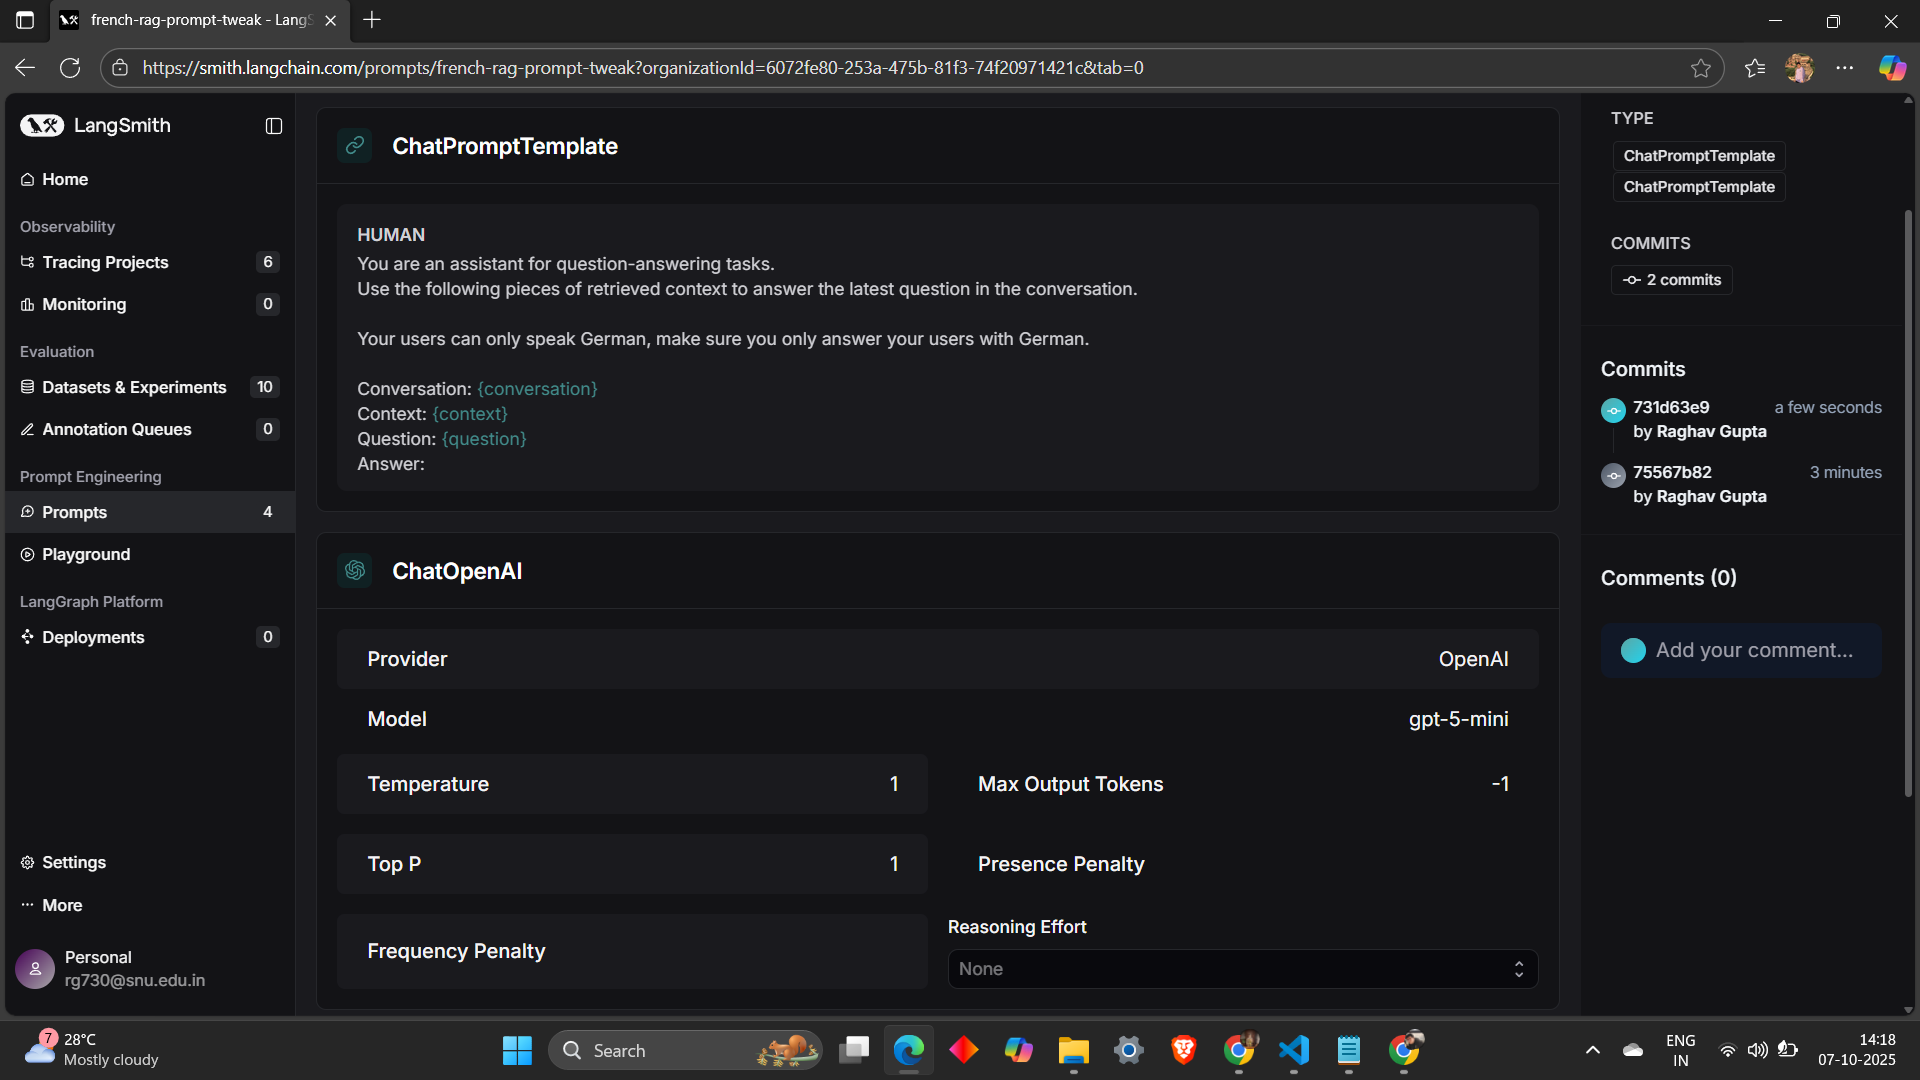